In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/NLP Project/train_v2_drcat_02.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Load the data
file_path = '/content/drive/MyDrive/NLP Project/train_v2_drcat_02.csv'
df = pd.read_csv(file_path)

# Preprocess text data
texts = df['text'].values
labels = df['label'].values

# Tokenization and sequence conversion
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Convert texts to sequences and pad them
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Encode labels (assuming binary classification)
labels = np.array(labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Set parameters for the Embedding layer
vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
embedding_dim = 100  # Dimension of the embedding vector

# Create the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification; change activation as needed for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 316s 275ms/step - accuracy: 0.8825 - loss: 0.2876 - val_accuracy: 0.9793 - val_loss: 0.0716
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.9814 - loss: 0.0675Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 320s 285ms/step - accuracy: 0.9306 - loss: 0.1956 - val_accuracy: 0.8525 - val_loss: 0.3404
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 309s 274ms/step - accuracy: 0.9591 - loss: 0.1133 - val_accuracy: 0.9872 - val_loss: 0.0475
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 334s 284ms/step - accuracy: 0.9924 - loss: 0.0308 - val_accuracy: 0.9813 - val_loss: 0.0585
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 310s 274ms/step - accuracy: 0.9947 - loss: 0.0214 - val_accuracy: 0.9914 - val_loss: 0.0308
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 321s 273ms/step - accuracy: 0.9820 - loss: 0.0587 - val_accuracy: 0.9815 - val_loss: 0.0752
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 306s 272ms/step - accuracy: 0.9922 - loss: 0.0295 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/NLP Project/my_model.h5')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

In [ ]:
file_path = '/content/drive/MyDrive/NLP Project/train_v2_drcat_02.csv'

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/NLP Project/my_model.h5'
loaded_model = load_model(model_path)

# Print the model summary to verify
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 4714, 100)           │       9,268,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,352,711 (35.68 MB)

 Trainable params: 9,352,709 (35.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
file_path = '/content/drive/MyDrive/NLP Project/train_v2_drcat_02.csv'
df = pd.read_csv(file_path)

# Preprocess text data
texts = df['text'].values
labels = df['label'].values

# Tokenization and sequence conversion
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Convert texts to sequences and pad them
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Encode labels (assuming binary classification)
labels = np.array(labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
loaded_model.evaluate(X_val, y_val)


281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 118ms/step - accuracy: 0.9906 - loss: 0.0381


[0.04142473265528679, 0.9889681339263916]

In [ ]:
y_pred = loaded_model.predict(X_val)

281/281 ━━━━━━━━━━━━━━━━━━━━ 30s 107ms/step


In [ ]:
y_pred

array([[9.9999046e-01],
       [4.3598448e-05],
       [9.9990439e-01],
       ...,
       [9.9989998e-01],
       [5.5573386e-04],
       [1.6429070e-04]], dtype=float32)

In [ ]:
y_pred = np.array([0 if y < 0.5 else 1 for y in y_pred])

In [ ]:
np.unique(y_pred, return_counts = True)

(array([0, 1]), array([5442, 3532]))

In [ ]:
np.unique(y_val, return_counts = True)

(array([0, 1]), array([5481, 3493]))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5481
           1       0.98      0.99      0.99      3493

    accuracy                           0.99      8974
   macro avg       0.99      0.99      0.99      8974
weighted avg       0.99      0.99      0.99      8974



In [ ]:
#Ablation Study

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Load the data
file_path = '/content/drive/MyDrive/NLP Project/train_v2_drcat_02.csv'
df = pd.read_csv(file_path)

# Preprocess text data
texts = df['text'].values
labels = df['label'].values

# Tokenization and sequence conversion
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Convert texts to sequences and pad them
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Encode labels (assuming binary classification)
labels = np.array(labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Set parameters for the Embedding layer
vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
embedding_dim = 100  # Dimension of the embedding vector

# Create the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification; change activation as needed for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 183s 156ms/step - accuracy: 0.6087 - loss: 0.6707 - val_accuracy: 0.6108 - val_loss: 0.6700
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 188s 149ms/step - accuracy: 0.6124 - loss: 0.6691 - val_accuracy: 0.6108 - val_loss: 0.6690
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 167s 149ms/step - accuracy: 0.6083 - loss: 0.6705 - val_accuracy: 0.6108 - val_loss: 0.6684
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 203s 150ms/step - accuracy: 0.6120 - loss: 0.6686 - val_accuracy: 0.6108 - val_loss: 0.6684
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 200s 148ms/step - accuracy: 0.6094 - loss: 0.6695 - val_accuracy: 0.6108 - val_loss: 0.6685
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 201s 147ms/step - accuracy: 0.6072 - loss: 0.6706 - val_accuracy: 0.6108 - val_loss: 0.6685
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 210s 154ms/step - accuracy: 0.6114 - loss: 0.6684 - val_accuracy: 0.6108 - val_loss: 0.6685
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 202s 154ms/step - ac

EDA

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/NLP Project/train_v2_drcat_02.csv'
df = pd.read_csv(file_path)
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from readability import Readability
import umap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import torch
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load dataset
file_path = '/content/drive/MyDrive/NLP Project/train_v2_drcat_02.csv'
data = pd.read_csv(file_path)
data.head()
# Move data to GPU if necessary (for numerical operations later)
data_tensor = torch.tensor(data['label'].values).to(device)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


In [ ]:
# 1. Data Overview
print("Dataset Shape:", data.shape)
print("First Few Rows:\n", data.head())
print("Missing Values:\n", data.isnull().sum())
print("Duplicate Rows:", data.duplicated().sum())


Dataset Shape: (44868, 5)
First Few Rows:
                                                 text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

          prompt_name           source  RDizzl3_seven  
0  Phones and driving  persuade_corpus          False  
1  Phones and driving  persuade_corpus          False  
2  Phones and driving  persuade_corpus          False  
3  Phones and driving  persuade_corpus          False  
4  Phones and driving  persuade_corpus          False  
Missing Values:
 text             0
label            0
prompt_name      0
source           0
RDizzl3_seven    0
dtype: int64
Duplicate Rows: 0


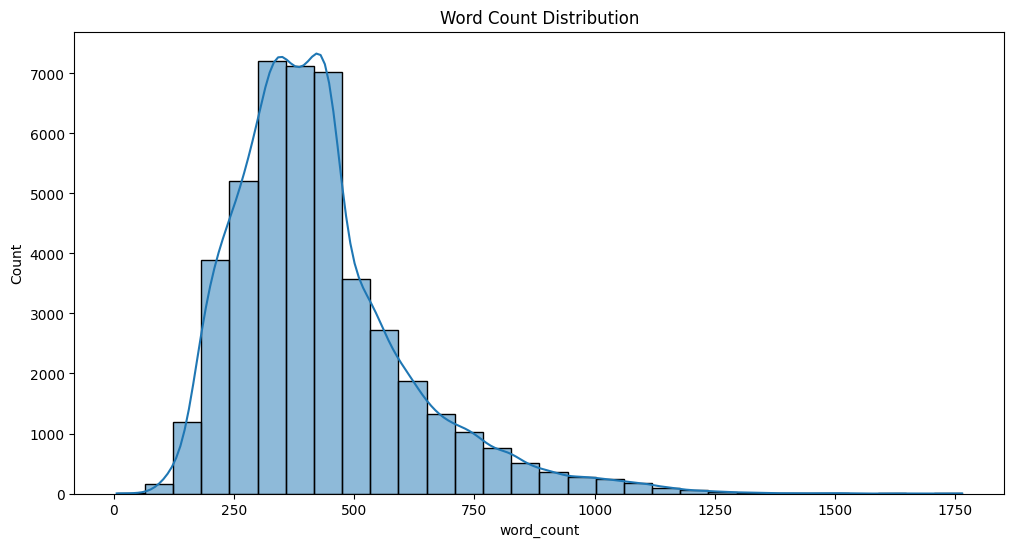

In [ ]:
# 2. Text Characteristics
# Add text length metrics
data['char_count'] = data['text'].apply(len)
data['word_count'] = data['text'].apply(lambda x: len(word_tokenize(x)))
data['sentence_count'] = data['text'].apply(lambda x: x.count('.'))

# Visualize text lengths
plt.figure(figsize=(12, 6))
sns.histplot(data['word_count'], kde=True, bins=30)
plt.title('Word Count Distribution')
plt.show()

In [ ]:
# Most common words
def get_common_words(texts, n=20):
    vectorizer = CountVectorizer(stop_words='english')
    word_counts = vectorizer.fit_transform(texts)
    word_sum = np.array(word_counts.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    common_words = pd.DataFrame({'word': vocab, 'count': word_sum})
    return common_words.sort_values(by='count', ascending=False).head(n)

common_words = get_common_words(data['text'])
print("Most Common Words:\n", common_words)


Most Common Words:
             word   count
65881   students  136861
50202     people   97007
60335     school   78453
40982       like   63512
11333        car   59006
33580       help   58806
69768       time   55082
42158       make   49900
11561       cars   46959
39354       just   43754
24066  electoral   42532
65877    student   41887
13928    college   40133
69251      think   38826
76183       work   37731
75039        way   33388
65027     states   31570
31825       good   31231
8718      better   30489
74544       vote   30455


In [ ]:
# Ensure that GPU is being used
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

Using device: cuda


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

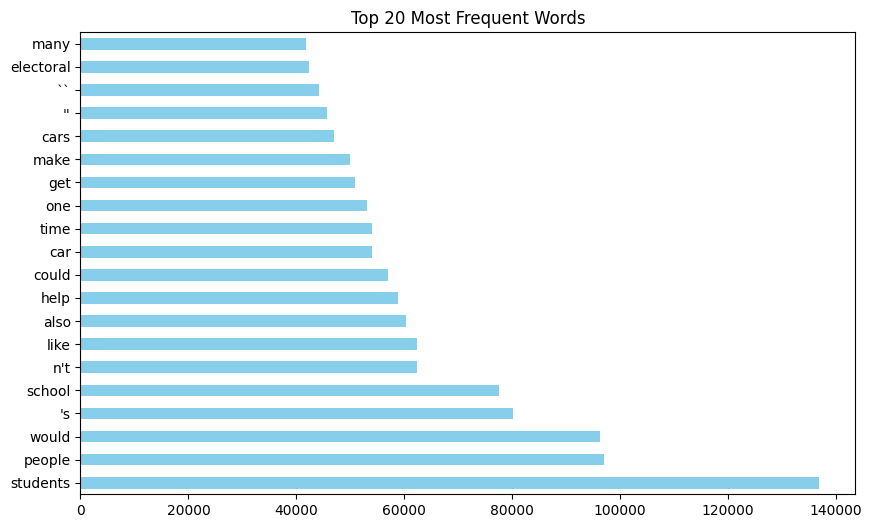

In [ ]:
# Clean and tokenize the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return cleaned_tokens

data['cleaned_text'] = data['text'].apply(clean_text)

# Most frequent words
all_words = [word for text in data['cleaned_text'] for word in text]
word_freq = pd.Series(all_words).value_counts()

# Plot the most common words
top_words = word_freq.head(20)
top_words.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.show()


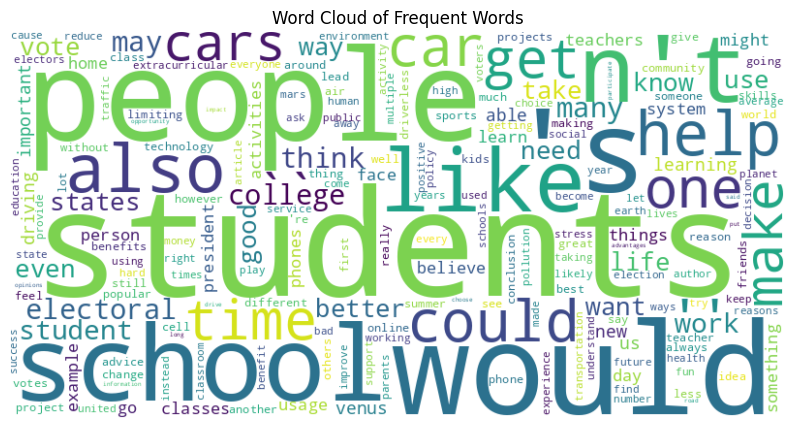

In [ ]:
# Word Cloud of Frequent Words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words')
plt.show()

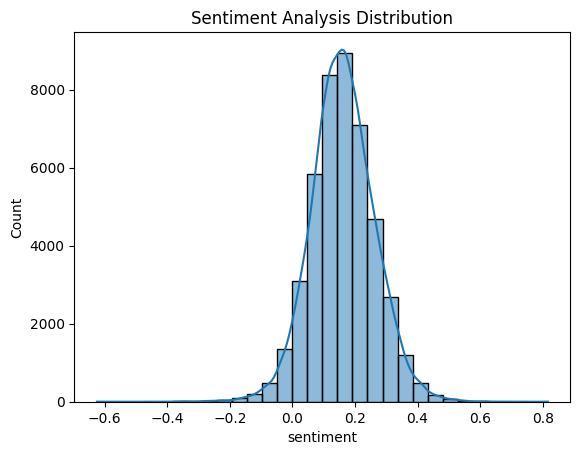

In [ ]:
# Sentiment Analysis using TextBlob
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(data['sentiment'], kde=True, bins=30)
plt.title('Sentiment Analysis Distribution')
plt.show()

In [ ]:
# Topic Modeling with LDA (Latent Dirichlet Allocation)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Visualizing topics
for i, topic in enumerate(lda.components_):
    print(f"Topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")

Topic #0:
['people', 'students', 'seagoing', 'school', 'driving', 'service', 'phone', 'cell', 'community', 'phones']


Topic #1:
['election', 'votes', 'popular', 'cars', 'car', 'states', 'president', 'vote', 'college', 'electoral']


Topic #2:
['goals', 'failure', 'people', 'attitude', 'technology', 'success', 'positive', 'car', 'driverless', 'cars']


Topic #3:
['summer', 'online', 'activities', 'help', 'classes', 'learning', 'like', 'student', 'school', 'students']


Topic #4:
['nasa', 'author', 'earth', 'limiting', 'planet', 'mars', 'usage', 'car', 'face', 'venus']




In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['text'])

# UMAP visualization of text embeddings
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=data['label'], cmap='viridis', s=10)
plt.title('UMAP projection of text embeddings')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Number of unique words in the dataset: 178016


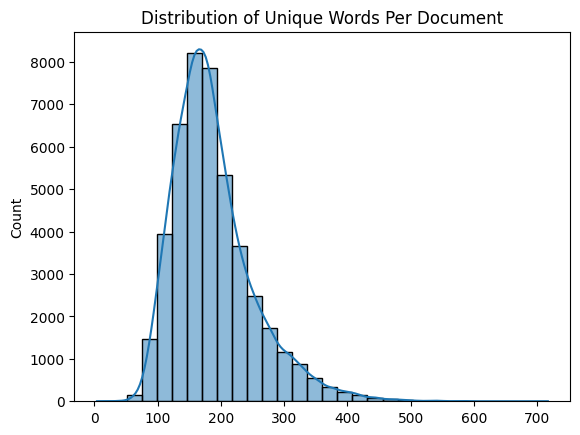

In [ ]:
# Check for uniqueness of words
all_words = [word for text in data['text'] for word in text.split()]
unique_words = set(all_words)
print(f"Number of unique words in the dataset: {len(unique_words)}")

# 1. **Uniqueness of Words**: Plotting the unique words distribution
sns.histplot([len(set(text.split())) for text in data['text']], kde=True, bins=30)
plt.title('Distribution of Unique Words Per Document')
plt.show()

In [ ]:
# 2. **N-grams Analysis**:
# Extract unigrams, bigrams, and trigrams from the text
from nltk.util import ngrams
from collections import Counter

# Function to extract n-grams
def extract_ngrams(text, n=1):
    tokens = text.split()
    return list(ngrams(tokens, n))

In [ ]:


# Extract n-grams for unigrams, bigrams, and trigrams
unigrams = [word for text in data['text'] for word in extract_ngrams(text, 1)]
bigrams = [bigram for text in data['text'] for bigram in extract_ngrams(text, 2)]
trigrams = [trigram for text in data['text'] for trigram in extract_ngrams(text, 3)]



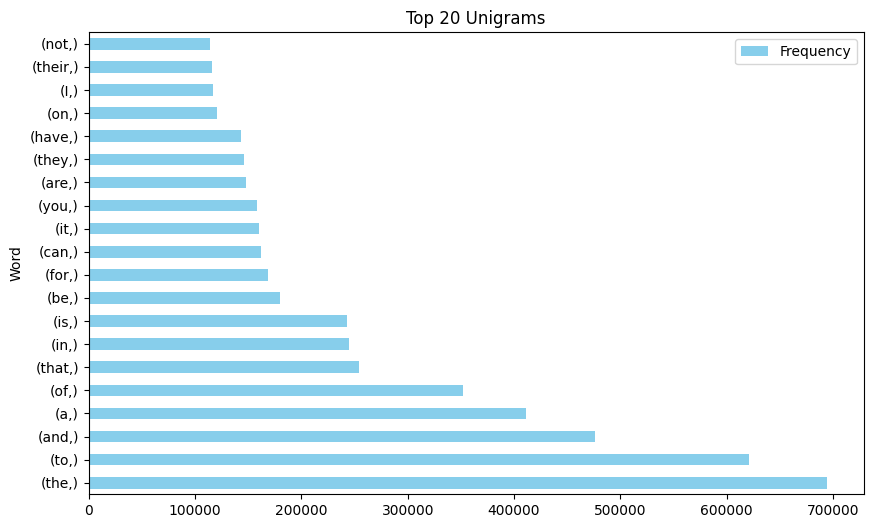

In [ ]:
# Plot most common unigrams
unigram_freq = Counter(unigrams)
top_unigrams = unigram_freq.most_common(20)
top_unigrams_df = pd.DataFrame(top_unigrams, columns=['Word', 'Frequency'])
top_unigrams_df.plot(kind='barh', x='Word', y='Frequency', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Unigrams')
plt.show()



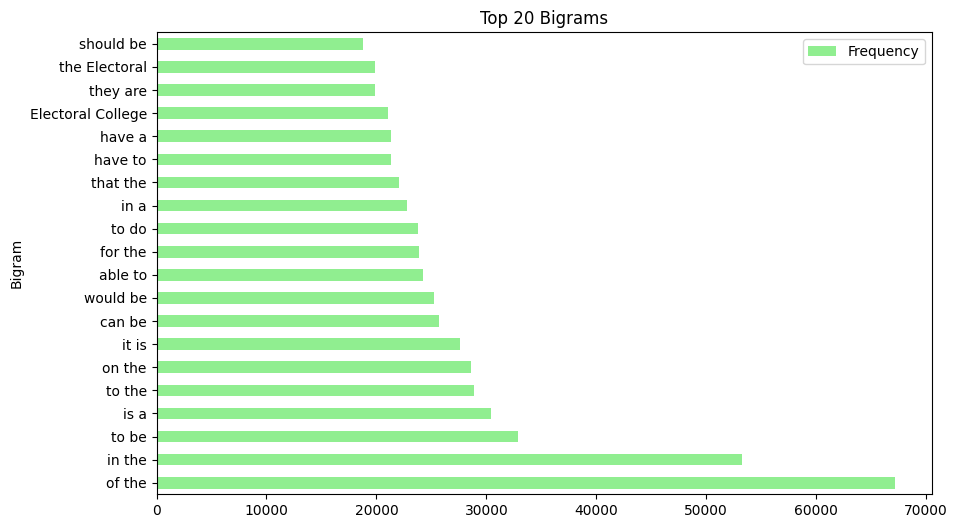

In [ ]:
# Plot most common bigrams
bigram_freq = Counter(bigrams)
top_bigrams = bigram_freq.most_common(20)
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
top_bigrams_df['Bigram'] = top_bigrams_df['Bigram'].apply(lambda x: ' '.join(x))
top_bigrams_df.plot(kind='barh', x='Bigram', y='Frequency', figsize=(10, 6), color='lightgreen')
plt.title('Top 20 Bigrams')
plt.show()



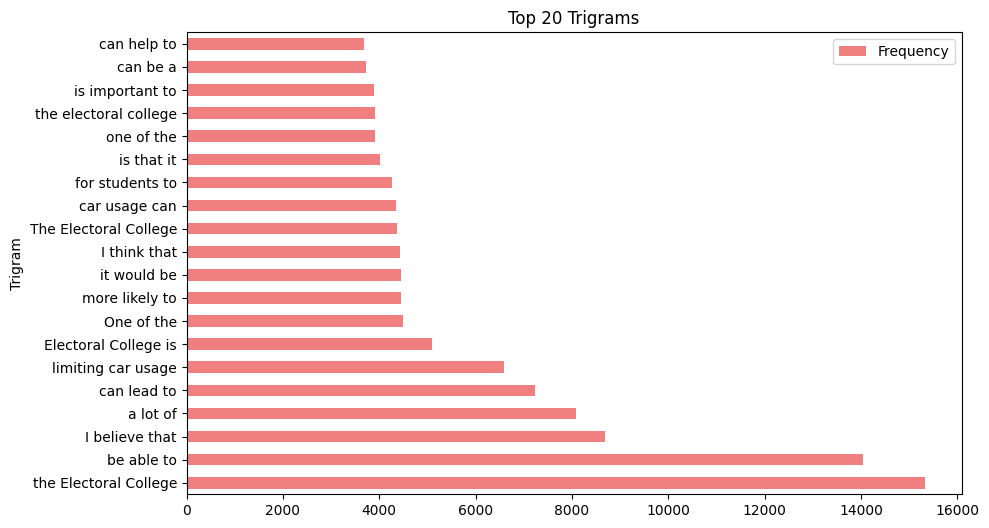

In [ ]:
# Plot most common trigrams
trigram_freq = Counter(trigrams)
top_trigrams = trigram_freq.most_common(20)
top_trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])
top_trigrams_df['Trigram'] = top_trigrams_df['Trigram'].apply(lambda x: ' '.join(x))
top_trigrams_df.plot(kind='barh', x='Trigram', y='Frequency', figsize=(10, 6), color='lightcoral')
plt.title('Top 20 Trigrams')
plt.show()


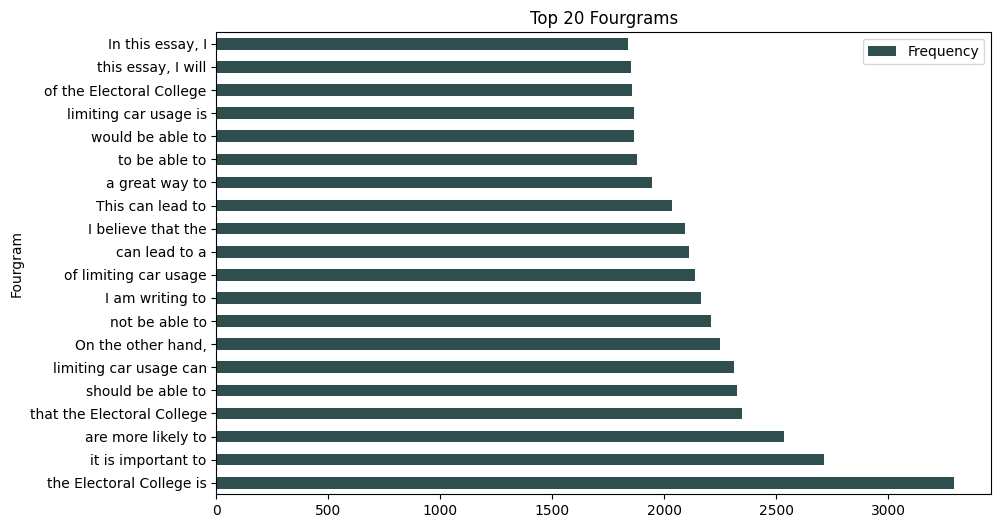

In [ ]:
fourgrams = [fourgram for text in data['text'] for fourgram in extract_ngrams(text, 4)]

# Plot most common fourgrams
fourgram_freq = Counter(fourgrams)
top_fourgrams = fourgram_freq.most_common(20)
top_fourgrams_df = pd.DataFrame(top_fourgrams, columns=['Fourgram', 'Frequency'])
top_fourgrams_df['Fourgram'] = top_fourgrams_df['Fourgram'].apply(lambda x: ' '.join(x))
top_fourgrams_df.plot(kind='barh', x='Fourgram', y='Frequency', figsize=(10, 6), color='darkslategray')
plt.title('Top 20 Fourgrams')
plt.show()

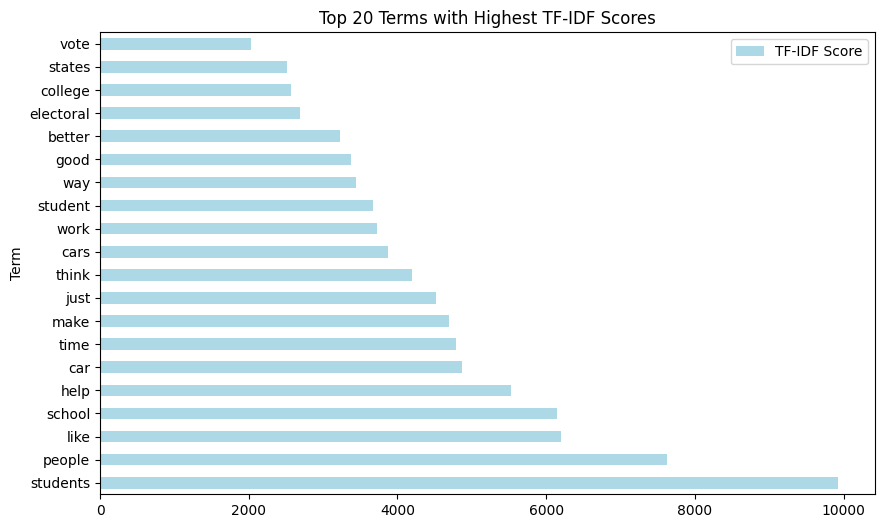

In [ ]:
# 3. **TF-IDF Analysis**:
# Vectorize the text data using TF-IDF and extract top terms across all documents

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Get the feature names (terms) and their corresponding scores
tfidf_scores = tfidf_matrix.sum(axis=0).A1
terms = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame of terms and their scores
tfidf_df = pd.DataFrame({'Term': terms, 'TF-IDF Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Plot the top 20 terms with highest TF-IDF scores
tfidf_df.head(20).plot(kind='barh', x='Term', y='TF-IDF Score', figsize=(10, 6), color='lightblue')
plt.title('Top 20 Terms with Highest TF-IDF Scores')
plt.show()